| <font color='red'>Belangrijk !!</font> |
|:---|
|Lees voor het maken de inleverinstructies door in de toetsbeschrijving (MS Teams, kanaal algemeen, Files, Moduledocumentatie).  Het niet opvolgen van deze instructies kan leiden tot een onvoldoende |

# Assignment 2

In deze assignment ga je een auto-verkoper helpen om twee onderzoeksvragen te beantwoorden:
  1. Hoe kan de klasse van een auto voorspeld worden?
  2. Hoe kan de prijs van een auto voorspeld worden?

In deze opdracht mag je zelf laten zien wat je hebt geleerd qua classificatie en regressie. Dit zijn de regels:
- Beantwoord per hoofdstuk de vragen
- Zorg dat je de gevraagde informatie/data in de voorgedefinieerde variabelen zet. 
- Er kunnen meer variabelen gedefinieerd zijn, dan je nodig hebt. Deze laat je op None staan om aan te geven dat je weet dat je deze niet nodig hebt om tot jouw oplossing te komen. Dit is onze manier om te testen of je de methode echt goed snapt en de juiste keuzes weet te maken.  
- Het staat je natuurlijk vrij om andere variabelen te definieren, maar onderstaande variabelen zijn degenen die we in het Codegrade script gebruiken om na te kijken. 
- Verander de namen van de variabelen __niet__
- Je kunt zoveel cellen met code en/of commentaar aanmaken als je wilt
- Zorg dat je een notebook inlevert, welke  __alleen__ de code bevat die bijdraagt aan jouw oplossing: je levert tenslotte ook niet jouw kladpapier in bij een schriftelijke toets.

## Opdracht en data beschrijving

Onze klant is een auto verkoper, genaamd <B>Auto4all</B>. Auto4all heeft de laatste jaren veel data verzameld over de auto's die ze via hun platform online verkopen. 
    
Meestal huurden ze een expert in om naar elk van de auto's te kijken, die ze willen kopen/verkopen en de expert de prijs en de status van de auto's te laten bepalen. Nu willen ze, met behulp van machine learning en de gegevens waarover ze op dit moment beschikken, het proces automatiseren. Dus in plaats van de prijs en de staat van een auto via een expert te laten voorspellen, ga je machine learning technieken toepassen om dit soort voorspellingen te doen.  


'Auto4all' heeft twee datasets tot zijn beschikking waarop je jouw machine learning modellen gaat toepassen.

Bij de eerste dataset per auto zijn de volgende kenmerken bijgehouden:


| __kolomnaam__ | __beschrijving__ | __datatype__ |
|:---|:---|:---|
| koop      | Aankoopprijs van de auto ('zeer hoog', 'hoog', 'medium', 'laag') | String   | 
| onderhoud | Prijs van het onderhoud van de auto ('zeer hoog', 'hoog', 'medium', 'laag') | String  | 
| deuren    | Aantal deuren in de auto  | float64 |
| personen  | Capaciteit in termen van te vervoeren personen | float64 | 
| kofferbak	  | De grootte van bagageruimte ('klein', 'medium', 'groot')| String  | 
| veiligheid | Geschatte veiligheid van de auto ('laag', 'medium', 'hoog') | String | 
| staat       | Auto staat ('goed', 'slecht')  | String | 


De data bij de de tweede dataset bevat de volgende kolommen:

| __kolomnaam__ | __beschrijving__ | __datatype__ |
|:---|:---|:---|
| auto_id     | Een nummer die elke auto identificeert | int64
| automerk    | De automerk van de auto (Volgswagen, Volvo, Polo, Suzuki, Fiat, Renault)  | String   | 
| carroserie  | Type auto, zoals cabrio of 4x4 | String  | 
| verkoopprijs       | De verkoopprijs in euro's  | float64 | 
| kilometerstand     | Het aantal km dat de auto heeft gereden | float64 | 
| versnellinsbak   | Type schakeling, handmatig, automaat, etc | String  | 
| leeftijd_auto | Aantal jaren dat de auto oud is | float64 | 
| type_motor    | Type brandstof (benzine, diesel, electrisch) | String  | 
| pk          | hoeveelheid paardekracht, een grove indicatie van de kracht van de motor  | float64 | 
| nieuwstaat  | Of de auto nieuw of al gebruikt is | String | 
| lease_bedrag | De auto kan worden geleast (gehuurd voor langere tijd). dit is dan het bedrag per maand | float64
| airco        | Of de auto is uitgerust met airconditioning of niet. Dus True of False | Boolean          

Volg de opdrachten hieronder om de onderzoeksvragen van 'Auto4all' op de juiste manier te beantwoorden. Het bedrijf is alleen geïnteresseerd in de verkoopprijs van auto's, niet in het lease bedrag.

### Opdracht
De opdracht bestaat uit 2 onderdelen: 
1. Ten eerste, ga je een machine learning model trainen en testen die de relatie tussen een auto's staat en de andere kenmerken modeleert. Het model kun je straks gebruiken om ook nieuwe, nu nog onbekende auto's, een correcte voorspelling van de staat te geven. Voor dit eerste onderdeel maak je gebruik van de data in de csv bestand "auto_klasse.csv"

2. Ten tweede ga je de prijs van de auto's voorspellen. Door deze keer ook gebruik te maken van machine learning technieken. De data die je gaat gebruiken bij dit onderdeel staat in het csv bestand "lease_data.csv"


### importeer de benodigde pakketten

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Opdracht deel1
## 1.1 Data inladen en voorbereiden

Laad de data van het csv bestand "auto_klasse.csv" in in een pandas dataframe zoals je tijdens de werkcolleges hebt geleerd. De string die gebruikt wordt in jouw code om de file in te lezen sla je op in de variabele ```pad_naar_file_1```

In [2]:
pad_naar_file_1 = "auto_klasse.csv"

In [3]:
def read_data(csv_file):
    
    dataframe = pd.read_csv(csv_file)
    return dataframe

Lees de file in en bereidt deze data voor op machine learning, zoals je geleerd hebt tijdens de werkcolleges. Onderstaande variabelen kun je gebruiken om bovenstaande vraag te beantwoorden. 

df_orig_1 moet de originele ingelezen data van de file pad_naar_file_1 bevatten. Deze variabele is dus van het type Pandas Dataframe. Zorg dat dit dataframe NIET veranderd is tijdens het maken van je notebook.

In [4]:
# vervang "None" door jouw code die de pad_naar_file_1 inleest
df_orig_1 = read_data(pad_naar_file_1)

Nadat je de data in ```df_orig_1``` hebt ingeladen, maak je een kopie van de dataframe in ```df_1```. ```df_1``` is de dataframe die je voor machine learning gaat gebruiken. 

In [5]:
# vervang "None" met je code die de dataframe in df_1 copieert
df_1 = df_orig_1.copy()

Nu ga je de data in df_1 voor machine learning voorbereiden. Volg de data voorbereiding stappen zoals je hebt geleerd om df_1 voor machine learning te bereiden. 

Je mag cellen toe voegen als het nodig is!

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koop           1728 non-null   object 
 1   onderhoud      1728 non-null   object 
 2   deuren         1728 non-null   float64
 3   personen       1728 non-null   float64
 4   kofferbak      1728 non-null   object 
 5   veiligheid     1728 non-null   object 
 6   Is_staat_goed  1728 non-null   bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 82.8+ KB


In [7]:
df_1.describe()

,deuren,personen
count,1728.000000,1728.000000
mean,3.500000,4.333333
std,1.118358,2.055399
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,7.000000
max,5.000000,7.000000


In [8]:
df_1.head(5)

,koop,onderhoud,deuren,personen,kofferbak,veiligheid,Is_staat_goed
0,zeer hoog,zeer hoog,2.0,2.0,klein,laag,False
1,zeer hoog,zeer hoog,2.0,2.0,klein,medium,False
2,zeer hoog,zeer hoog,2.0,2.0,klein,hoog,False
3,zeer hoog,zeer hoog,2.0,2.0,medium,laag,False
4,zeer hoog,zeer hoog,2.0,2.0,medium,medium,False


In [9]:
df_1.isnull().sum(axis = 0)

koop             0
onderhoud        0
deuren           0
personen         0
kofferbak        0
veiligheid       0
Is_staat_goed    0
dtype: int64

In [10]:
def data_voorbereiden(dataframe):
    set_koop = {'laag': 0, 'medium': 1, 'hoog': 2, 'zeer hoog': 3}
    df_1["koop"] = df_1["koop"].map(set_koop)

    set_onderhoud = {'laag': 0, 'medium': 1, 'hoog': 2, 'zeer hoog': 3}
    df_1["onderhoud"] = df_1["onderhoud"].map(set_onderhoud)

    set_kofferbak = {'klein': 0, 'medium': 1, 'groot': 2}
    df_1["kofferbak"] = df_1["kofferbak"].map(set_kofferbak)

    set_veiligheid = {'laag': 0, 'medium': 1, 'hoog': 2}
    df_1["veiligheid"] = df_1["veiligheid"].map(set_veiligheid)

    set_Is_staat_goed = {False: 0, True: 1}
    df_1["Is_staat_goed"] = df_1["Is_staat_goed"].map(set_Is_staat_goed)

    return dataframe

In [11]:
df_1 = data_voorbereiden(df_1)

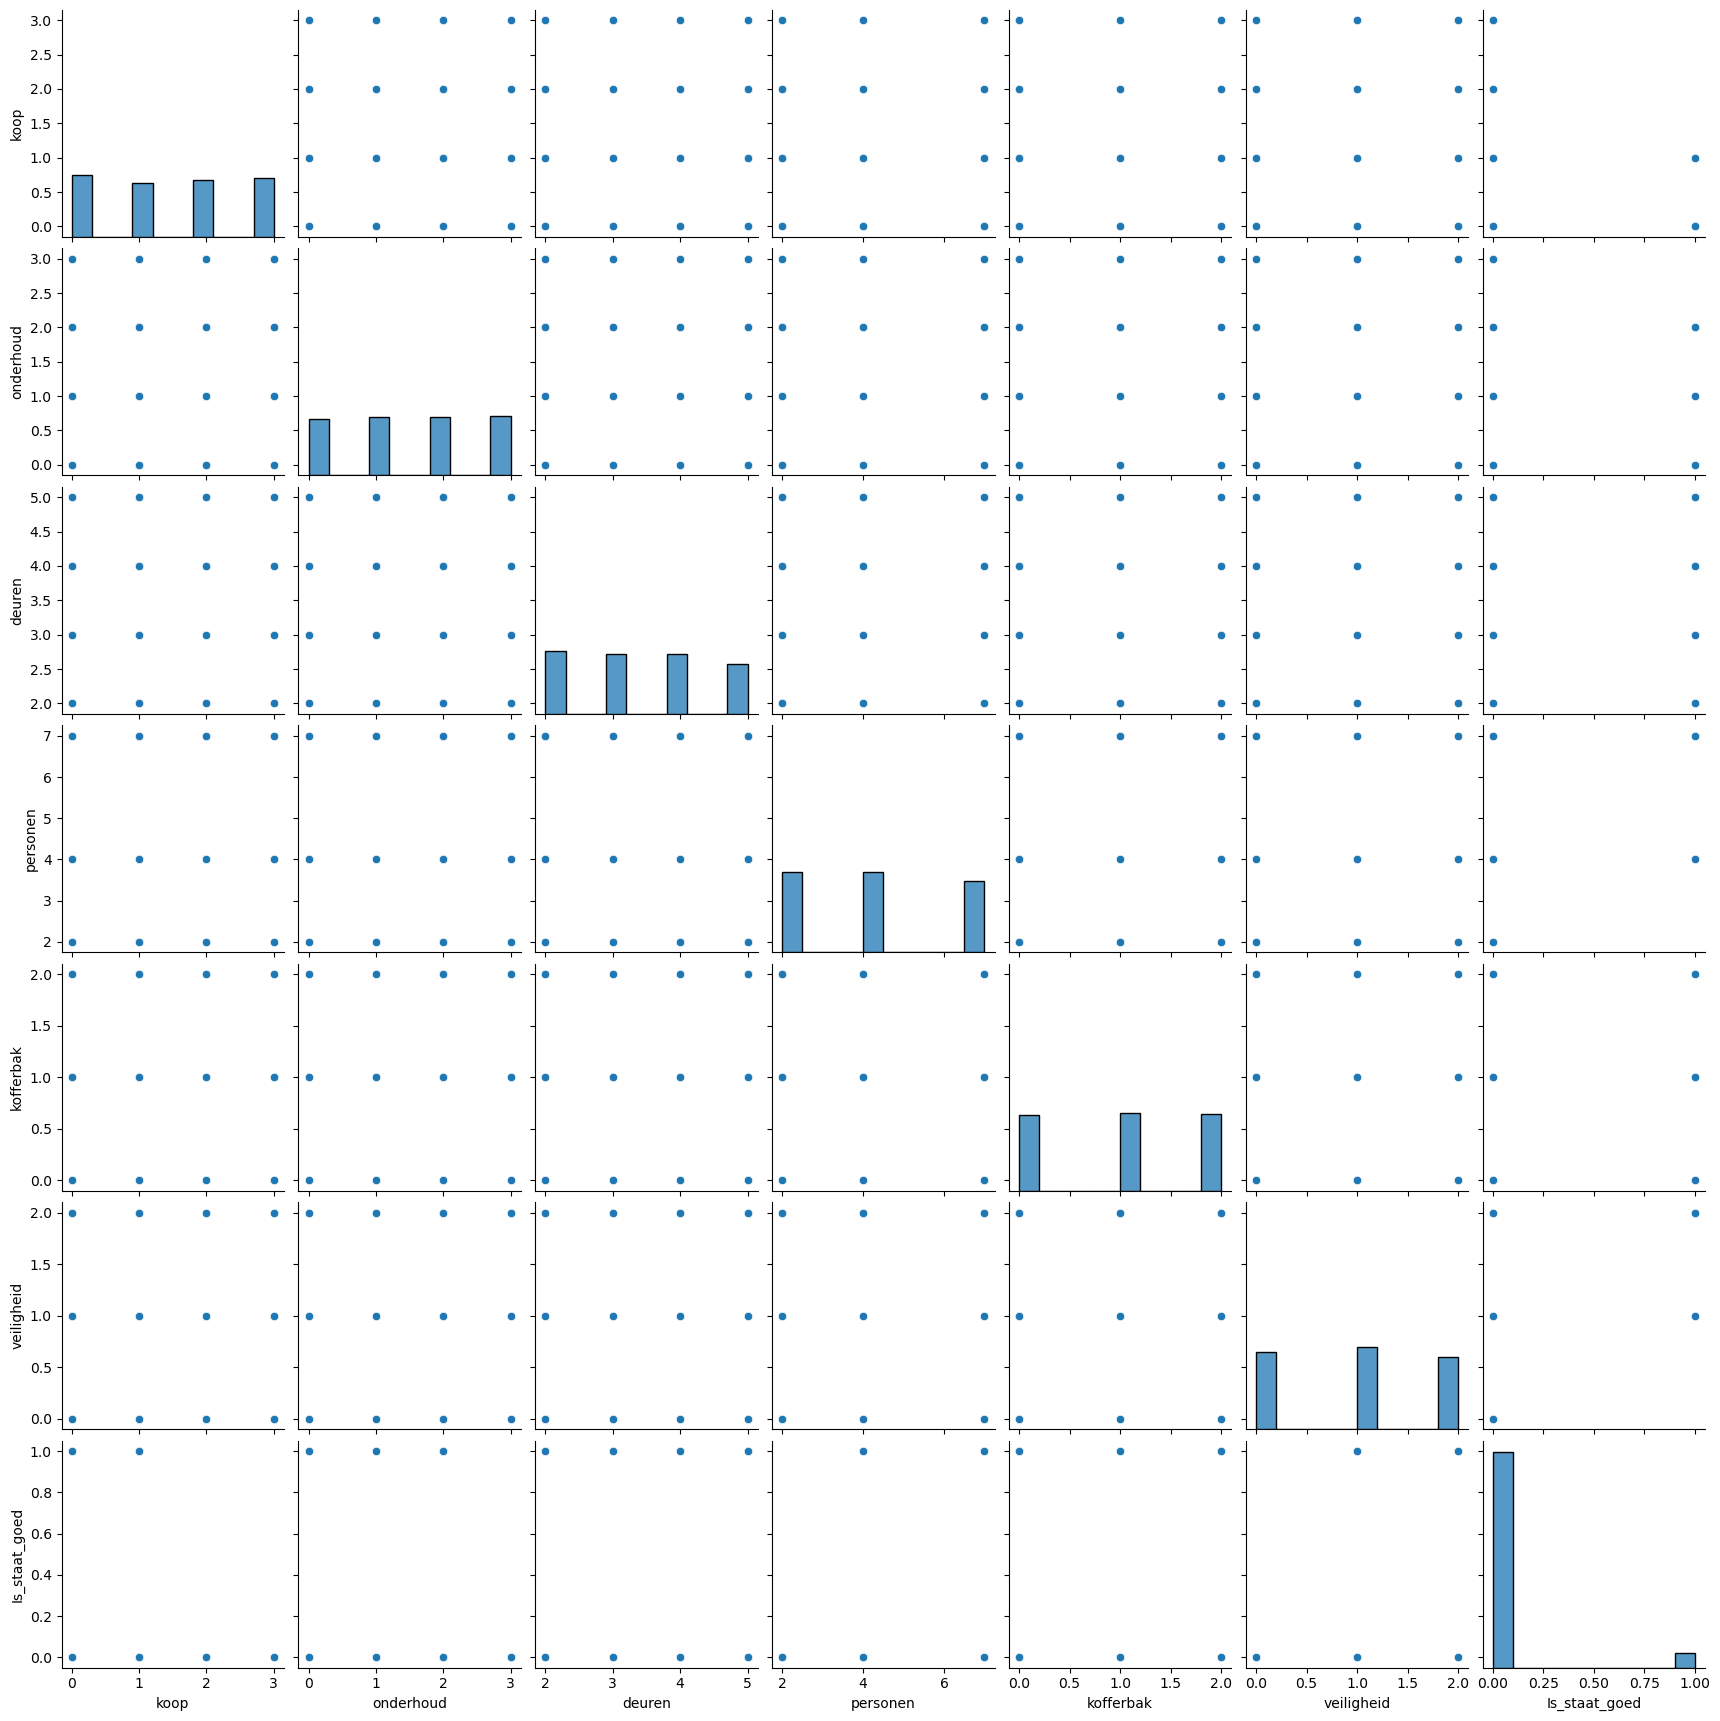

In [12]:
sns.pairplot(df_1.sample(500), height=2.5);

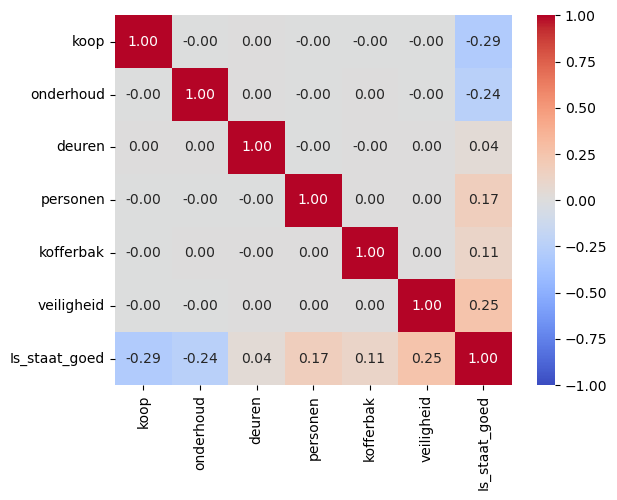

In [13]:
sns.heatmap(df_1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.2f')
plt.show()

Zorg ervoor dat de data op de juiste manier wordt voorbereid en vul onderstaande  variabelen met de data zoals je geleerd hebt.  Denk je dat je de variabele niet nodig hebt? Laat deze dan op None staan. Zo kunnen we zien of je echt begrijpt wat je aan het doen bent. 

Aan het einde van dit hoofdstuk, moet de data zo zijn voorbereid dat er geen extra voorbereidingsstappen op de dataset nodig zijn. De data kan zo als input voor het machine learning algoritme gebruikt worden.



De variabelen die je kunt vullen met zinvolle data voor deze stap zijn:

| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| scaler_1 | de StandardScaler scaler object die je hebt gebruikt | sklearn StandardScaler |
| X_1 | de onafhankelijke variabelen van de gehele dataset | Pandas Dataframe |
| y_1 | de afhankelijke variabelen van de gehele dataset | Pandas Series |
| X_train_1 | de onafhankelijke variabelen van de trainingsset | Pandas Dataframe |
| y_train_1 | de afhankelijke variabelen van de trainingsset | Pandas Series |
| X_test_1 | de onafhankelijke variabelen van de testset | Pandas Dataframe |
| y_test_1 | de afhankelijke variabelen van de testset | Pandas Series |

Maak hieronder meerdere cellen aan om jouw machine learning code te schrijven en de oplossing voor het vraagstuk te geven

In [14]:
scaler_1 = StandardScaler()

In [15]:
X_1 = df_1.drop(['Is_staat_goed'],axis=1)
y_1 = df_1['Is_staat_goed']

In [16]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [17]:
X_train_1 = pd.DataFrame(scaler_1.fit_transform(X_train_1), columns=list(X_1.columns))
X_test_1 = pd.DataFrame(scaler_1.transform(X_test_1), columns=list(X_1.columns))

## 1.2 Voorspel of een auto in een goede staat is 

Ontwikkel nu een machine learning algoritme dat zo goed mogelijk voorspelt of een auto in een goede staat is of niet. Ook wil Auto4all weten wat de kansen zijn dat een auto een goede of een slechte staat heeft op basis van de kenmerken die bij de auto horen. 
Maak hierbij gebruik van de technieken die je geleerd hebt in het werkcollege. 

Nu dat je het probleem snapt en als je naar de afhankelijke variabele kijkt, welke type machine learning gaat het over bij de eerste deel van de opdracht? 
 1. Regressie
 2. Classificatie
 3. Clustering

Vul in de variabele deel1_antwoord met 1, 2 of 3

In [18]:
deel1_antwoord = 2

Onderstaande variabelen kun je gebruiken om bovenstaande vraag te beantwoorden. Zorg ervoor dat de data op de juiste manier wordt voorbereid en vul de variabelen met de data zoals je geleerd hebt. Denk je dat je de variabele niet nodig hebt? Laat deze dan op None staan. Zo kunnen we zien of je echt begrijpt wat je aan het doen bent. 


| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| model_1  | Jouw gekozen model | Pandas Series |
| fit_1 | Het model dat uit de fit komt | Pandas Dataframe |
| uitkomst_1 | het resultaat van je algoritme  | Numpy Array |
| score_1 | de score die je vertelt hoe goed jouw model op de data past | float |
| scores_1  | Een lijst met betrouwbaarheid scores van jouw jouw model | Numpy Array  |
| scores_mean_1  | De gemiddelde betrouwbaarheidsscore van jouw jouw model | float64  |
| confusion_matrix_1  | De confusion matrix voor jouw gekozen model | Numpy Array  |
| tp_1  | De True Positives  | int  |
| fp_1  | De False Positives  | int  |
| tn_1  | De True Negatives  | int  |
| fn_1  | De False Negatives | int | 
| fpr_1 | de false positive rate (FPR) | Pandas Dataframe |
| tpr_1 | de true positive rate (TPR) | Pandas Dataframe |

In [19]:
fit_1 = None

In [20]:
model_1 = SVC(kernel='rbf', random_state=5, probability=True)
model_1.fit(X_train_1, y_train_1)

SVC(probability=True, random_state=5)

In [21]:
uitkomst_1 = model_1.predict(X_test_1)
score_1 = metrics.accuracy_score(y_test_1, uitkomst_1)
score_1

0.9884393063583815

In [22]:
scores_1 = cross_val_score(model_1, X_train_1, y_train_1, cv = 6)
scores_1

array([0.99009901, 0.99009901, 0.99009901, 0.98507463, 0.960199  ,
       0.98507463])

In [23]:
scores_mean_1 = np.mean(scores_1)
scores_mean_1

0.9834408814015729

In [24]:
confusion_matrix_1 = metrics.confusion_matrix(y_test_1, uitkomst_1)
confusion_matrix_1

array([[472,   4],
       [  2,  41]], dtype=int64)

In [25]:
tn_1 = 472
fp_1 = 4
fn_1 = 2
tp_1= 41

In [26]:
fpr_1 = fp_1 / (fp_1 + tn_1)
fpr_1

0.008403361344537815

In [27]:
tpr_1 = tp_1 / (tp_1 + fn_1)
tpr_1

0.9534883720930233

## 1.3. Kan jouw model de staat van een nieuwe auto voorspellen?

Nu dat je jouw model hebt getraind en getest, kun je jouw model gebruiken om de staat van een nieuwe auto te voorspellen. Auto4all vroeg je om de staat van de onderstaande auto te voorspellen, met behulp van jouw al gemaakte machine learning model. 


Nu is de vraag, wat denkt jouw model van deze auto? Laten we jouw beste model gebruiken om te voorspellen of de staat goed is of niet. 

Hieronder alle gegevens van de auto:

In [28]:
nieuw_auto = {'koop':0,
            'onderhoud': 1,
            'deuren': 4,
            'personen': 6,
            'kofferbak': 2,
            'veiligheid': 2,
            'Is_staat_goed' : 1
           }

In [29]:
nieuw_auto = pd.DataFrame(nieuw_auto, index=[0])

In [30]:
X_nieuw_auto = nieuw_auto.drop(['Is_staat_goed'], axis=1)
X_nieuw_auto = pd.DataFrame(scaler_1.transform(X_nieuw_auto), columns=list(X_nieuw_auto.columns))

In [31]:
voorspelling_nieuw = model_1.predict(X_nieuw_auto)[0]
voorspelling_nieuw

1

Onderstaande variabelen kun je gebruiken om bovenstaande vraag te beantwoorden. Zorg ervoor dat de data op de juiste manier wordt voorbereid en vul de variabelen met de data zoals je geleerd hebt. Denk je dat je de variabele niet nodig hebt? Laat deze dan op None staan. Zo kunnen we zien of je echt begrijpt wat je aan het doen bent. 


| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| voorspelling_nieuw  | Een waarde 1 of 0  | Integer |
| jouw_antwoord_nieuw  | Een waarde 'Goed' of 'Slecht'  | String |
| nauwkeurigheid_nieuw | De kans dat het model gelijk heeft | float |
| kans_staat_goed_nieuw | De berekende kans dat de staat van de auto goed is  | float |
| kans_staat_slecht_nieuw | De berekende kans dat de staat van de auto slecht is| float |
| confusion_matrix_nieuw  | De confusion matrix voor jouw gekozen model | Numpy Array  |
| tn_nieuw  | De True Positives  | int  |
| fp_nieuw  | De False Positives  | int  |
| fn_nieuw  | De True Negatives  | int  |
| tp_nieuw  | De False Negatives | int | 
| fpr_nieuw | de false positive rate (FPR) | Pandas Dataframe |
| tpr_nieuw | de true positive rate (TPR) | Pandas Dataframe |

In [32]:
uitslag = {1: "Goed", 0: "Slecht"}
jouw_antwoord_nieuw = uitslag[voorspelling_nieuw]

In [33]:
nauwkeurigheid_nieuw = (tn_1 + tp_1)/(tn_1 + tp_1 + fp_1 + fn_1)
nauwkeurigheid_nieuw

0.9884393063583815

In [34]:
kans_staat_goed_nieuw = (1 - nauwkeurigheid_nieuw) * 100
kans_staat_slecht_nieuw = nauwkeurigheid_nieuw * 100

# Opdracht deel2
## 2.1 Data inladen en voorbereiden

Auto4all is tot nu toe erg tevreden over jouw werk! Hij wil zijn prijzen zo goed mogelijk aanpassen aan de Nederlandse markt. Hij wil dus weten wat een redelijke marktconforme prijs is voor een auto, die hij in de verkoop zet. Gelukkig kan je hem hierbij ook helpen: 

In dit onderdeel, ga je gebruik maken van de tweede dataset (lease_data.csv). Ga terug naar (Opdracht en data beschrijving) om de kenmerken van de data nog door te lezen.   

Nu je het probleem snapt en als je naar de afhankelijke variabele kijkt, welke type machine learning gaat het over bij dit tweede deel van de opdracht? 
 1. Regressie
 2. Classificatie
 3. Clustering

Vul in de variabele deel2_antwoord met 1, 2 of 3

In [35]:
deel2_antwoord = 1

Lees de datafile "lease_data.csv" in en bereid de data voor zoals je in de werkcolleges hebt geleerd. 

In [36]:
pad_naar_file_2 = "lease_data.csv"

In [37]:
df_orig_2 = read_data(pad_naar_file_2)

In [38]:
df_2 = df_orig_2.copy()

df_2 is de dataframe die je gaat voorbereiden voor machine learning.

Maak nu op basis van de eigenschappen van de auto's een model om te voorspellen wat de meest gebruikelijke verkoopprijs is voor een bepaald type auto.

Onderstaande variabelen kun je gebruiken om bovenstaande vraag te beantwoorden. Zorg ervoor dat de data op de juiste manier wordt voorbereid en vul de variabelen in met de data zoals je geleerd hebt.  

Denk je dat je de variabele niet nodig hebt? Laat deze dan op None staan. Zo kunnen we zien of je echt begrijpt wat je aan het doen bent. 

De variabelen die je kunt vullen met zinvolle data voor dit probleem zijn:

| __Variabele__ | __beschrijving__ | __datatype__
|:---|:--:|:---|
| scaler_2 | de StandardScaler scaler object | sklearn StandardScaler |
| X_2 | de onafhankelijke variabelen van de gehele dataset | Pandas Dataframe |
| y_2 | de afhankelijke variabelen van de gehele dataset | Pandas Series |
| X_train_2 | de onafhankelijke variabelen van de trainingsset | Pandas Dataframe |
| y_train_2 | de afhankelijke variabelen van de trainingsset | Pandas Series |
| X_test_2 | de onafhankelijke variabelen van de testset | Pandas Dataframe |
| y_test_2 | de afhankelijke variabelen van de testset | Pandas Series |
| model_2  | Jouw gekozen machine learning model | SKLearn model |
| fit_2 | Het model dat uit de fit komt | SKLearn model |
| uitkomst_2 | het resultaat van je machine learning algoritme | Numpy Array |
| score_2 | de score die je vertelt hoe goed jouw model op de data past | float |



In [39]:
scaler_2 = None

In [40]:
df_2.describe()

,auto_id,verkoopprijsprijs,kilometerstand,leeftijd_auto,pk,lease_bedrag
count,15347.000000,1.532300e+04,15302.000000,15319.000000,14707.000000,8213.000000
mean,23658.624878,3.206311e+04,88317.537315,7.453228,197.117155,523.573106
std,18475.054270,3.561329e+04,76203.153579,8.177183,117.645204,368.016219
min,4154.000000,5.000000e+02,0.000000,0.000000,1.000000,54.536972
25%,7990.500000,1.395000e+04,26343.250000,3.000000,122.000000,307.045131
50%,11827.000000,2.235000e+04,73368.000000,5.000000,156.000000,421.748374
75%,46983.500000,3.795000e+04,133212.500000,10.000000,225.000000,637.491281
max,52413.000000,1.250000e+06,827190.000000,110.000000,799.000000,10647.613438


In [41]:
df_2.head(5)

,auto_id,automerk,carroserie,verkoopprijsprijs,kilometerstand,versnellinsbak,leeftijd_auto,type_motor,pk,nieuwstaat,lease_bedrag,airco
0,4154,Volgswagen,Cabrio,23945.0,12388.0,Handgeschakeld,11.0,Benzine,184.0,Gebruikt,315.899324,True
1,4155,Volgswagen,Cabrio,49750.0,43950.0,Automatisch,4.0,Benzine,184.0,Gebruikt,577.259982,False
2,4156,Volgswagen,Cabrio,14950.0,82125.0,Automatisch,14.0,Benzine,184.0,Gebruikt,233.758131,True
3,4157,Volgswagen,Cabrio,24500.0,103000.0,Automatisch,19.0,Benzine,245.0,Gebruikt,433.101885,True
4,4158,Volgswagen,Cabrio,34700.0,45739.0,Automatisch,5.0,Benzine,156.0,Gebruikt,440.903384,False


In [42]:
df_2.isnull().sum(axis = 0)

auto_id                 0
automerk                0
carroserie              0
verkoopprijsprijs      24
kilometerstand         45
versnellinsbak        434
leeftijd_auto          28
type_motor             29
pk                    640
nieuwstaat             27
lease_bedrag         7134
airco                   0
dtype: int64

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15347 entries, 0 to 15346
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   auto_id            15347 non-null  int64  
 1   automerk           15347 non-null  object 
 2   carroserie         15347 non-null  object 
 3   verkoopprijsprijs  15323 non-null  float64
 4   kilometerstand     15302 non-null  float64
 5   versnellinsbak     14913 non-null  object 
 6   leeftijd_auto      15319 non-null  float64
 7   type_motor         15318 non-null  object 
 8   pk                 14707 non-null  float64
 9   nieuwstaat         15320 non-null  object 
 10  lease_bedrag       8213 non-null   float64
 11  airco              15347 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 1.3+ MB


In [44]:
df_2.isnull().sum(axis = 0)

auto_id                 0
automerk                0
carroserie              0
verkoopprijsprijs      24
kilometerstand         45
versnellinsbak        434
leeftijd_auto          28
type_motor             29
pk                    640
nieuwstaat             27
lease_bedrag         7134
airco                   0
dtype: int64

In [45]:
def data_voorbereiden(dataframe):
    set_merk = {'Volgswagen':0,'Volvo':1, 'Polo':2, 'Suzuki':3, 'Fiat':4, 'Renault':5}
    dataframe['automerk'] = dataframe['automerk'].map(set_merk)

    set_carro = {'Cabrio':0,'Coupé':1, 'SUV / ofroader':2, 'sedan': 3, 'StationWagon': 4,
                     'Bedrijfswagen': 5, 'MPV': 6, 'Overig': 7, 'Hatchback': 8}
    dataframe['carroserie'] = dataframe['carroserie'].map(set_carro)

    set_versnelling = {'Handgeschakeld':0,'Automatisch':1, 'Half/Semi-automaat':2}
    dataframe['versnellinsbak'] = dataframe['versnellinsbak'].map(set_versnelling)

    set_motor = {'Benzine':0,'LPG':1, 'Diesel':2, 'Elektrisch':3, 'CNG':4, 'Ethanol':5}
    dataframe['type_motor'] = dataframe['type_motor'].map(set_motor)

    set_staat = {'Gebruikt':0,'Oldtimer':1, 'Nieuw':2, 'Demo':3, 'Nieuw en op kenteken':4}
    dataframe['nieuwstaat'] = dataframe['nieuwstaat'].map(set_staat)

    dataframe['airco'] = dataframe['airco'].astype(int)

    return dataframe

In [46]:
def vervang_nan(dataframe):    
    dataframe['verkoopprijsprijs'].fillna(dataframe['verkoopprijsprijs'].median(), inplace=True)
    dataframe['kilometerstand'].fillna(dataframe['kilometerstand'].median(), inplace=True)
    dataframe['type_motor'].fillna(dataframe['type_motor'].mode()[0], inplace=True)
    dataframe['nieuwstaat'].fillna(dataframe['nieuwstaat'].mode()[0], inplace=True)
    dataframe['leeftijd_auto'].fillna(dataframe['leeftijd_auto'].median(), inplace=True)
    dataframe['versnellinsbak'].fillna(dataframe['versnellinsbak'].mode()[0], inplace=True)
    dataframe['pk'].fillna(dataframe['pk'].mean(), inplace=True)
    
    return dataframe

df_2.isnull().sum(axis = 0)

auto_id                 0
automerk                0
carroserie              0
verkoopprijsprijs      24
kilometerstand         45
versnellinsbak        434
leeftijd_auto          28
type_motor             29
pk                    640
nieuwstaat             27
lease_bedrag         7134
airco                   0
dtype: int64

In [47]:
df_2 = data_voorbereiden(df_2)
df_2 = vervang_nan(df_2)

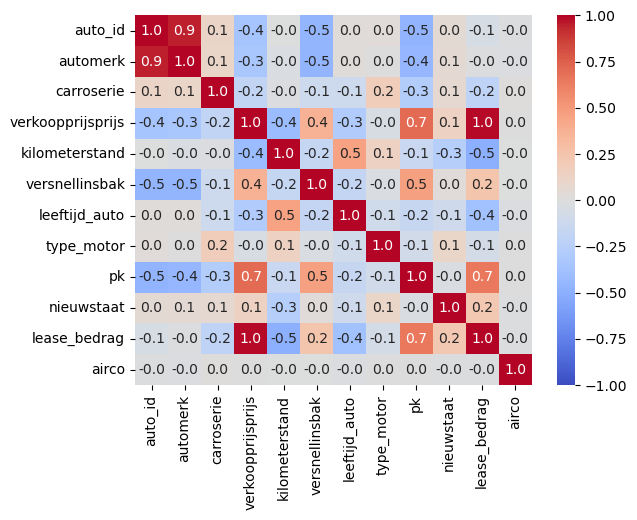

In [48]:
sns.heatmap(df_2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1f')
plt.show()

In [49]:
def verwijder_kolommen(dataframe):
    dataframe.drop('lease_bedrag', inplace=True, axis=1)
    dataframe.drop('auto_id', inplace=True, axis=1)

    return dataframe

df_2 = verwijder_kolommen(df_2)

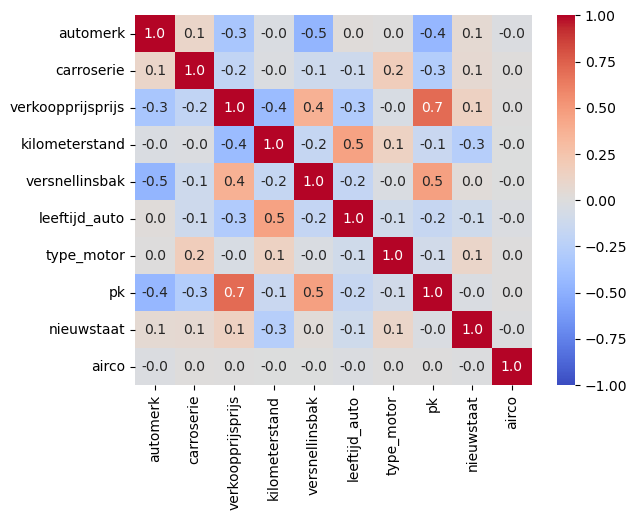

In [50]:
sns.heatmap(df_2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.1f')
plt.show()

In [51]:
y_2 = df_2['verkoopprijsprijs']
X_2 = df_2.drop(['verkoopprijsprijs'], axis=1)

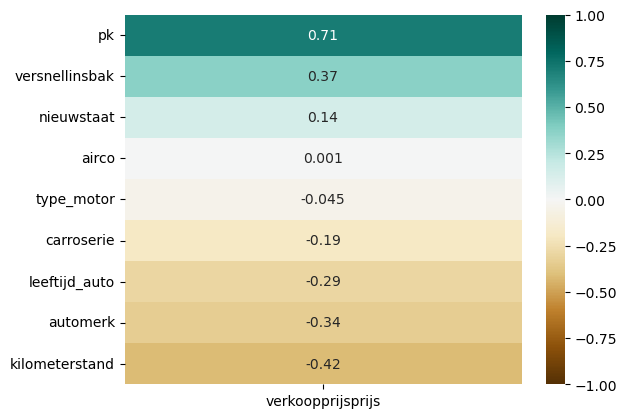

In [52]:
correlation = pd.DataFrame(X_2.corrwith(y_2),columns=["verkoopprijsprijs"]).sort_values(by='verkoopprijsprijs', ascending=False)
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=12)

In [54]:
model_2 = LinearRegression()
fit_2 = model_2.fit(X_train_2, y_train_2)

In [55]:
uitkomst_2 = fit_2.predict(X_test_2)

In [56]:
score_2 = mean_squared_error(y_test_2, uitkomst_2)
score_2

353216291.101361

# 2.2 Voorspel de verkoopprijs van een nieuwe auto


Laten we het algoritme op nieuwe auto's testen om te kijken of het klopt. Bepaal de prijs van de volgende auto:

In [57]:
nieuwe_auto = {'auto_id': 1832,
            'automerk': 'Volvo',
            'carroserie': 'Hatchback',
            'kilometerstand': 70.0,
            'versnellinsbak': 'Automatisch',
            'leeftijd_auto': 1.0, 
            'type_motor': 'Diesel',
            'pk': 131.0,
            'nieuwstaat': 'Nieuw en op kenteken',
            'lease_bedrag': 720.35,
            'airco': True
           }
df_jij = pd.DataFrame(nieuwe_auto, index=[0])
df_jij = data_voorbereiden(df_jij)
df_jij = verwijder_kolommen(df_jij)

#print jouw data zodat je kunt zien of het klopt:
df_jij.head()

,automerk,carroserie,kilometerstand,versnellinsbak,leeftijd_auto,type_motor,pk,nieuwstaat,airco
0,1,8,70.0,1,1.0,2,131.0,4,1


In [58]:
voorspelling_jij = fit_2.predict(df_jij)[0]
voorspelling_jij

51501.24817627741


### Veel succes!

Chaimae, Herman, Mischa en Mick 